# Jores et al 2021 Plotting 
**Authorship:**
Adam Klie, *09/12/2022*
***
**Description:**
Notebook to plot benchmarking results for all trained models on the Jores et al (2021) dataset.
***

In [15]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

import os
import glob
import logging
import torch
import numpy as np
import pandas as pd
import eugene as eu
import matplotlib.pyplot as plt
import matplotlib

# For illustrator editing
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [16]:
eu.settings.dataset_dir = "/cellar/users/aklie/data/eugene/jores21"
eu.settings.output_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/output/jores21"
eu.settings.logging_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/logs/jores21"
eu.settings.config_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/configs/jores21"
eu.settings.figure_dir = "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/figures/jores21"

# Generate performance figures

## Leaf models

In [10]:
# Read in the predictions 
sdata_leaf = eu.dl.read_h5sd(os.path.join(eu.settings.output_dir, "leaf_test_predictions.h5sd"))

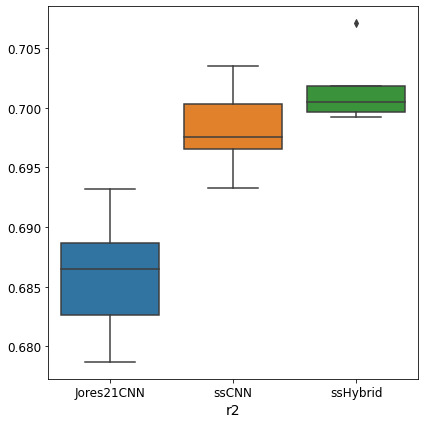

In [11]:
# Summarize performance across models for r2
model_scores = eu.pl.performance_summary(
    sdata_leaf,
    target="enrichment",
    prediction_groups=["Jores21CNN"]*5 + ["ssCNN"]*5 + ["ssHybrid"]*5,
    metrics=["r2"],
    add_swarm=False,
    figsize=(6, 6),
    save=os.path.join(eu.settings.figure_dir, "leaf_performance_boxplot.pdf")
)

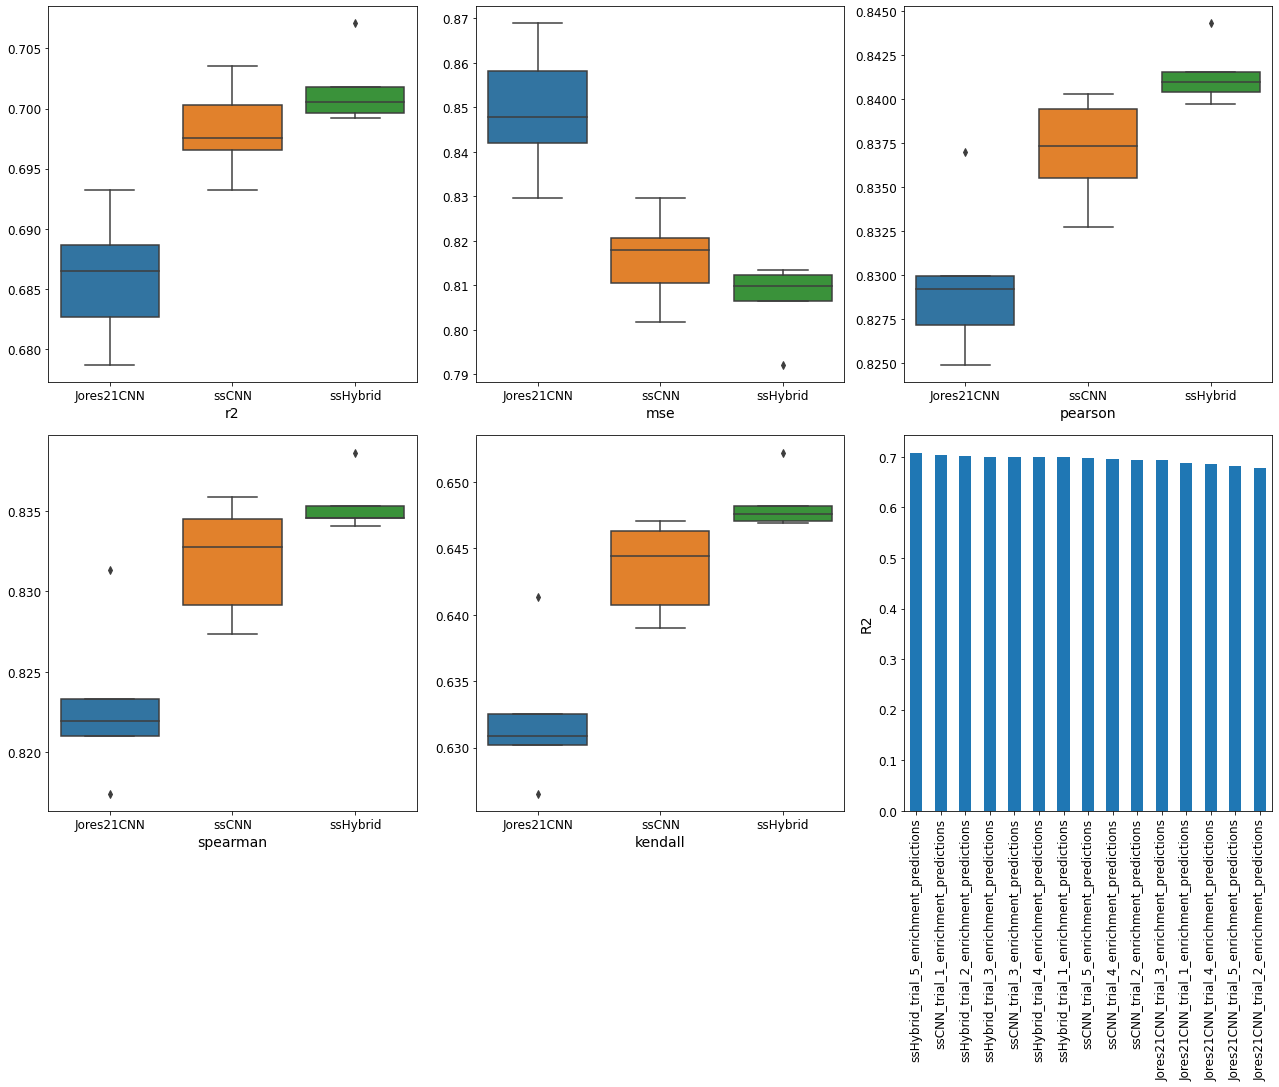

In [12]:
# Summarize performance across models for a metric
model_scores = eu.pl.performance_summary(
    sdata_leaf,
    target="enrichment",
    prediction_groups=["Jores21CNN"]*5 + ["ssCNN"]*5 + ["ssHybrid"]*5,
    metrics=["r2", "mse", "pearson", "spearman", "kendall"],
    add_swarm=False,
    figsize=(6, 6),
)

# Identify the best model from returned model scores
r2_sorted = model_scores["r2"].sort_values(ascending=False)
r2_sorted.plot(kind="bar", ylabel="R2")
plt.savefig(os.path.join(eu.settings.figure_dir, "leaf_performance_summary.pdf"))

Group R2 MSE Spearmanr
At 0.5164099190409797 0.6735613405589178 0.7046093358911515
Sb 0.66927878113486 0.8979140299942686 0.8363478785599603
Zm 0.7465031255417363 0.7718591023794221 0.8672154866420015


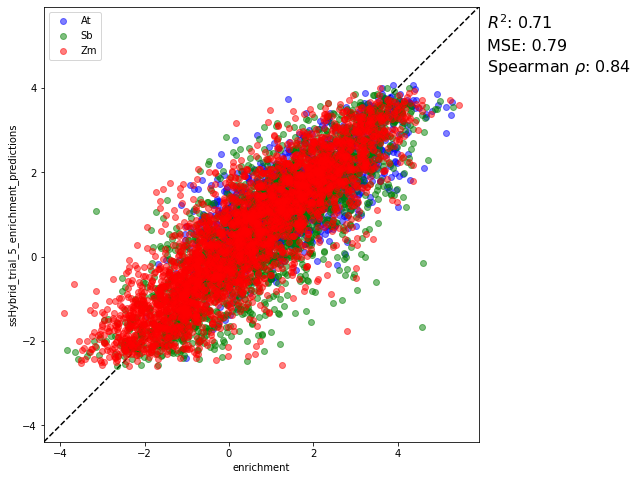

In [13]:
# Plot the performances across species for the best model
best_preds = r2_sorted.index[0]
ax = eu.pl.performance_scatter(
    sdata_leaf, 
    targets="enrichment", 
    predictions=best_preds,
    alpha=0.5,
    groupby="sp",
    figsize=(8, 8),
    rasterized=True,
    save=os.path.join(eu.settings.figure_dir, "leaf_best_model_performance_scatter_by_sp.pdf")
)

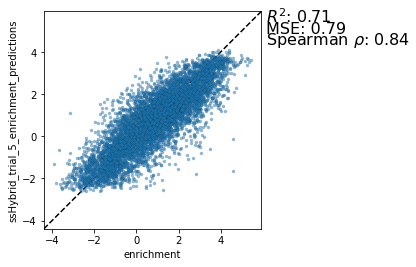

In [14]:
# Plot the performances across species for the best model
ax = eu.pl.performance_scatter(
    sdata_leaf, 
    targets="enrichment", 
    predictions=best_preds,
    alpha=0.5,
    figsize=(4, 4),
    rasterized=True,
    color=
    save=os.path.join(eu.settings.figure_dir, "leaf_best_model_performance_scatter.pdf")
)

## Proto models

In [9]:
# Read in if already made predictions and generated file above
sdata_proto = eu.dl.read_h5sd(os.path.join(eu.settings.output_dir, "proto_test_predictions.h5sd"))

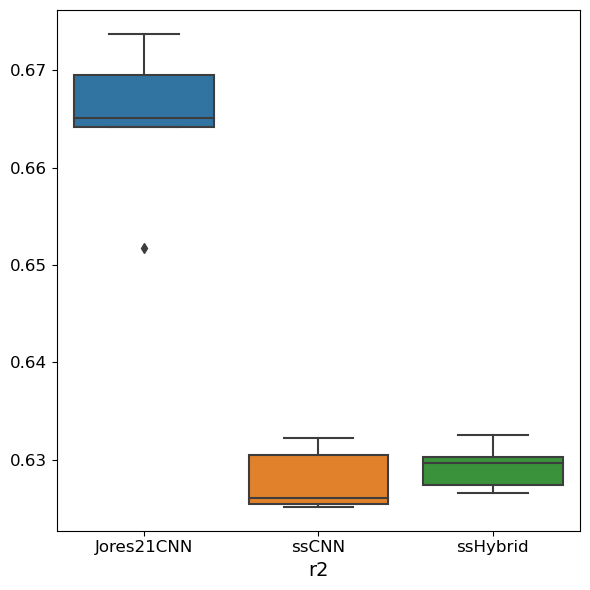

In [18]:
# Summarize performance across models for r2
model_scores = eu.pl.performance_summary(
    sdata_proto,
    target="enrichment",
    prediction_groups=["Jores21CNN"]*5 + ["ssCNN"]*5 + ["ssHybrid"]*5,
    metrics=["r2"],
    add_swarm=False,
    figsize=(6, 6),
    save=os.path.join(eu.settings.figure_dir, "proto_performance_boxplot.pdf")
)

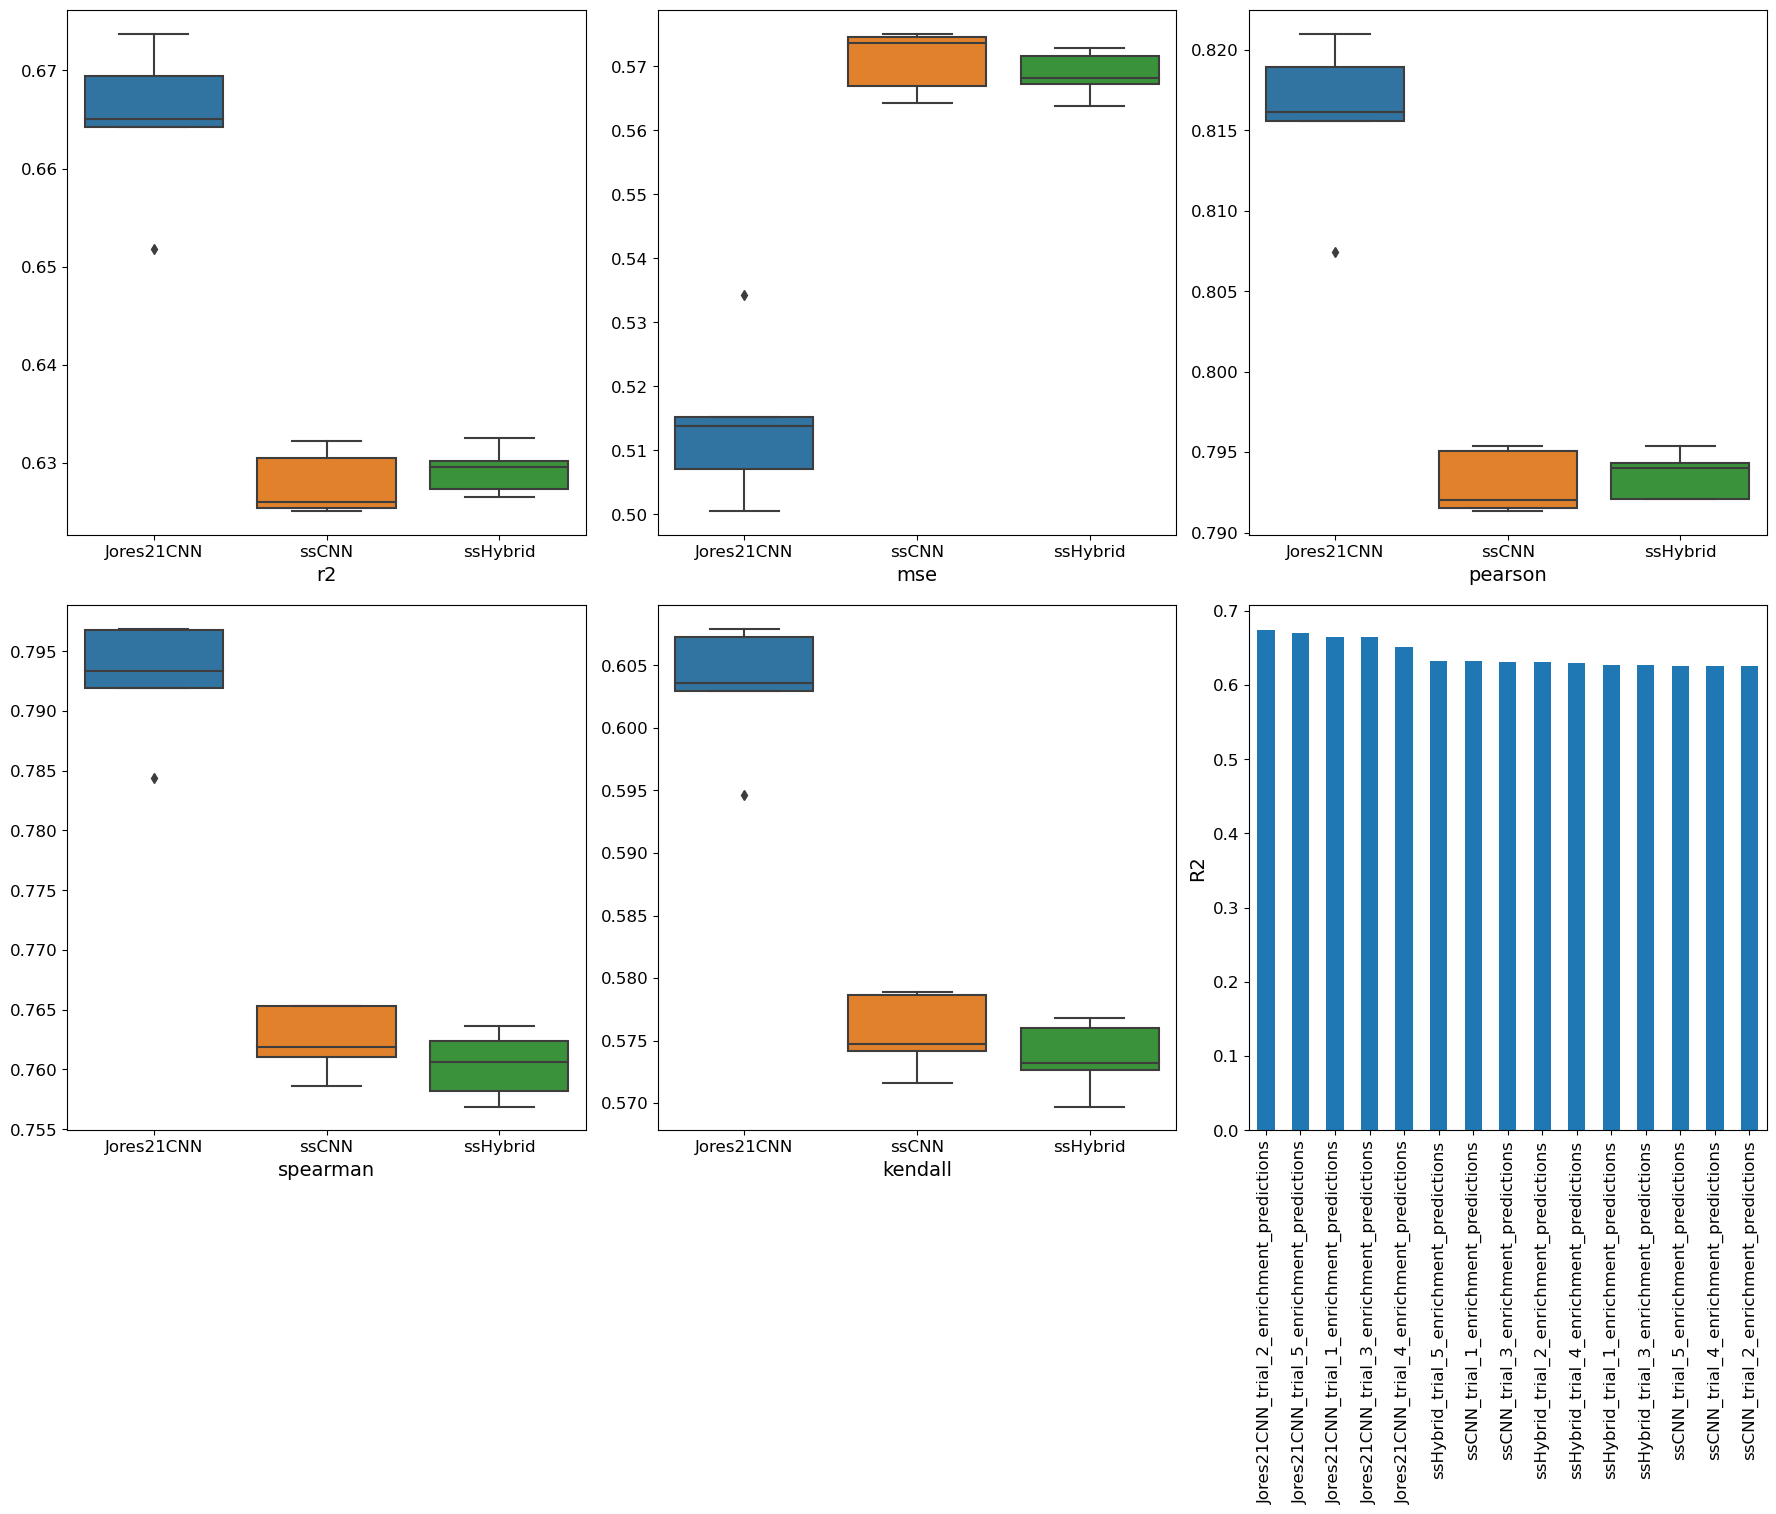

In [19]:
# Summarize performance across models for a metric
model_scores = eu.pl.performance_summary(
    sdata_proto,
    target="enrichment",
    prediction_groups=["Jores21CNN"]*5 + ["ssCNN"]*5 + ["ssHybrid"]*5,
    metrics=["r2", "mse", "pearson", "spearman", "kendall"],
    add_swarm=False,
    figsize=(6, 6),
)

# Identify the best model from returned model scores
r2_sorted = model_scores["r2"].sort_values(ascending=False)
r2_sorted.plot(kind="bar", ylabel="R2")
plt.savefig(os.path.join(eu.settings.figure_dir, "proto_performance_summary.pdf"))

Group R2 MSE Spearmanr
At 0.5514243013895882 0.6476637872909053 0.7372850748322327
Sb 0.6106554247981983 0.488565439478022 0.7572806525870309
Zm 0.6897345973090998 0.43401701350725963 0.8171762409955199


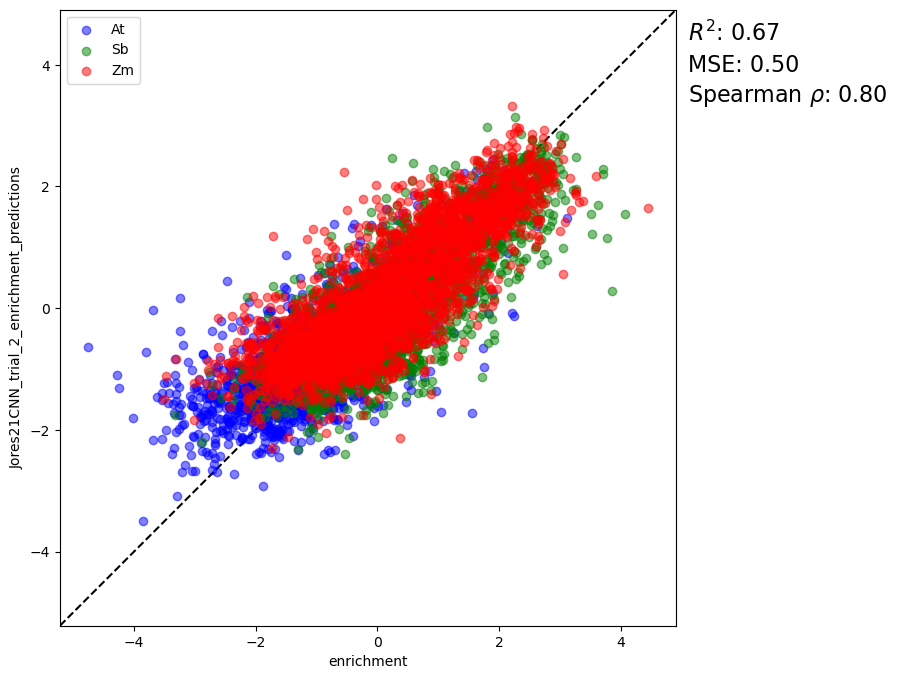

In [12]:
# Plot the performances across species for the best model
best_preds = r2_sorted.index[0]
ax = eu.pl.performance_scatter(
    sdata_proto, 
    targets="enrichment", 
    predictions=best_preds,
    alpha=0.5,
    groupby="sp",
    figsize=(8, 8),
    rasterized=True,
    save=os.path.join(eu.settings.figure_dir, "proto_best_model_performance_scatter_by_sp.pdf")
)

## Combined models

In [13]:
sdata_combined = eu.dl.read_h5sd(os.path.join(eu.settings.output_dir, "combined_test_predictions.h5sd"))

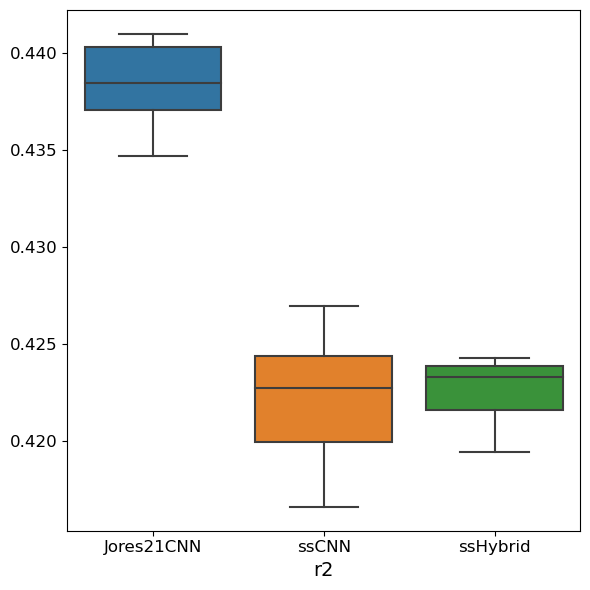

In [20]:
# Summarize performance across models for a metric
model_scores = eu.pl.performance_summary(
    sdata_combined,
    target="enrichment",
    prediction_groups=["Jores21CNN"]*5 + ["ssCNN"]*5 + ["ssHybrid"]*5,
    metrics=["r2"],
    add_swarm=False,
    figsize=(6, 6),
    save= os.path.join(eu.settings.figure_dir, "combined_performance_boxplot.pdf")
)

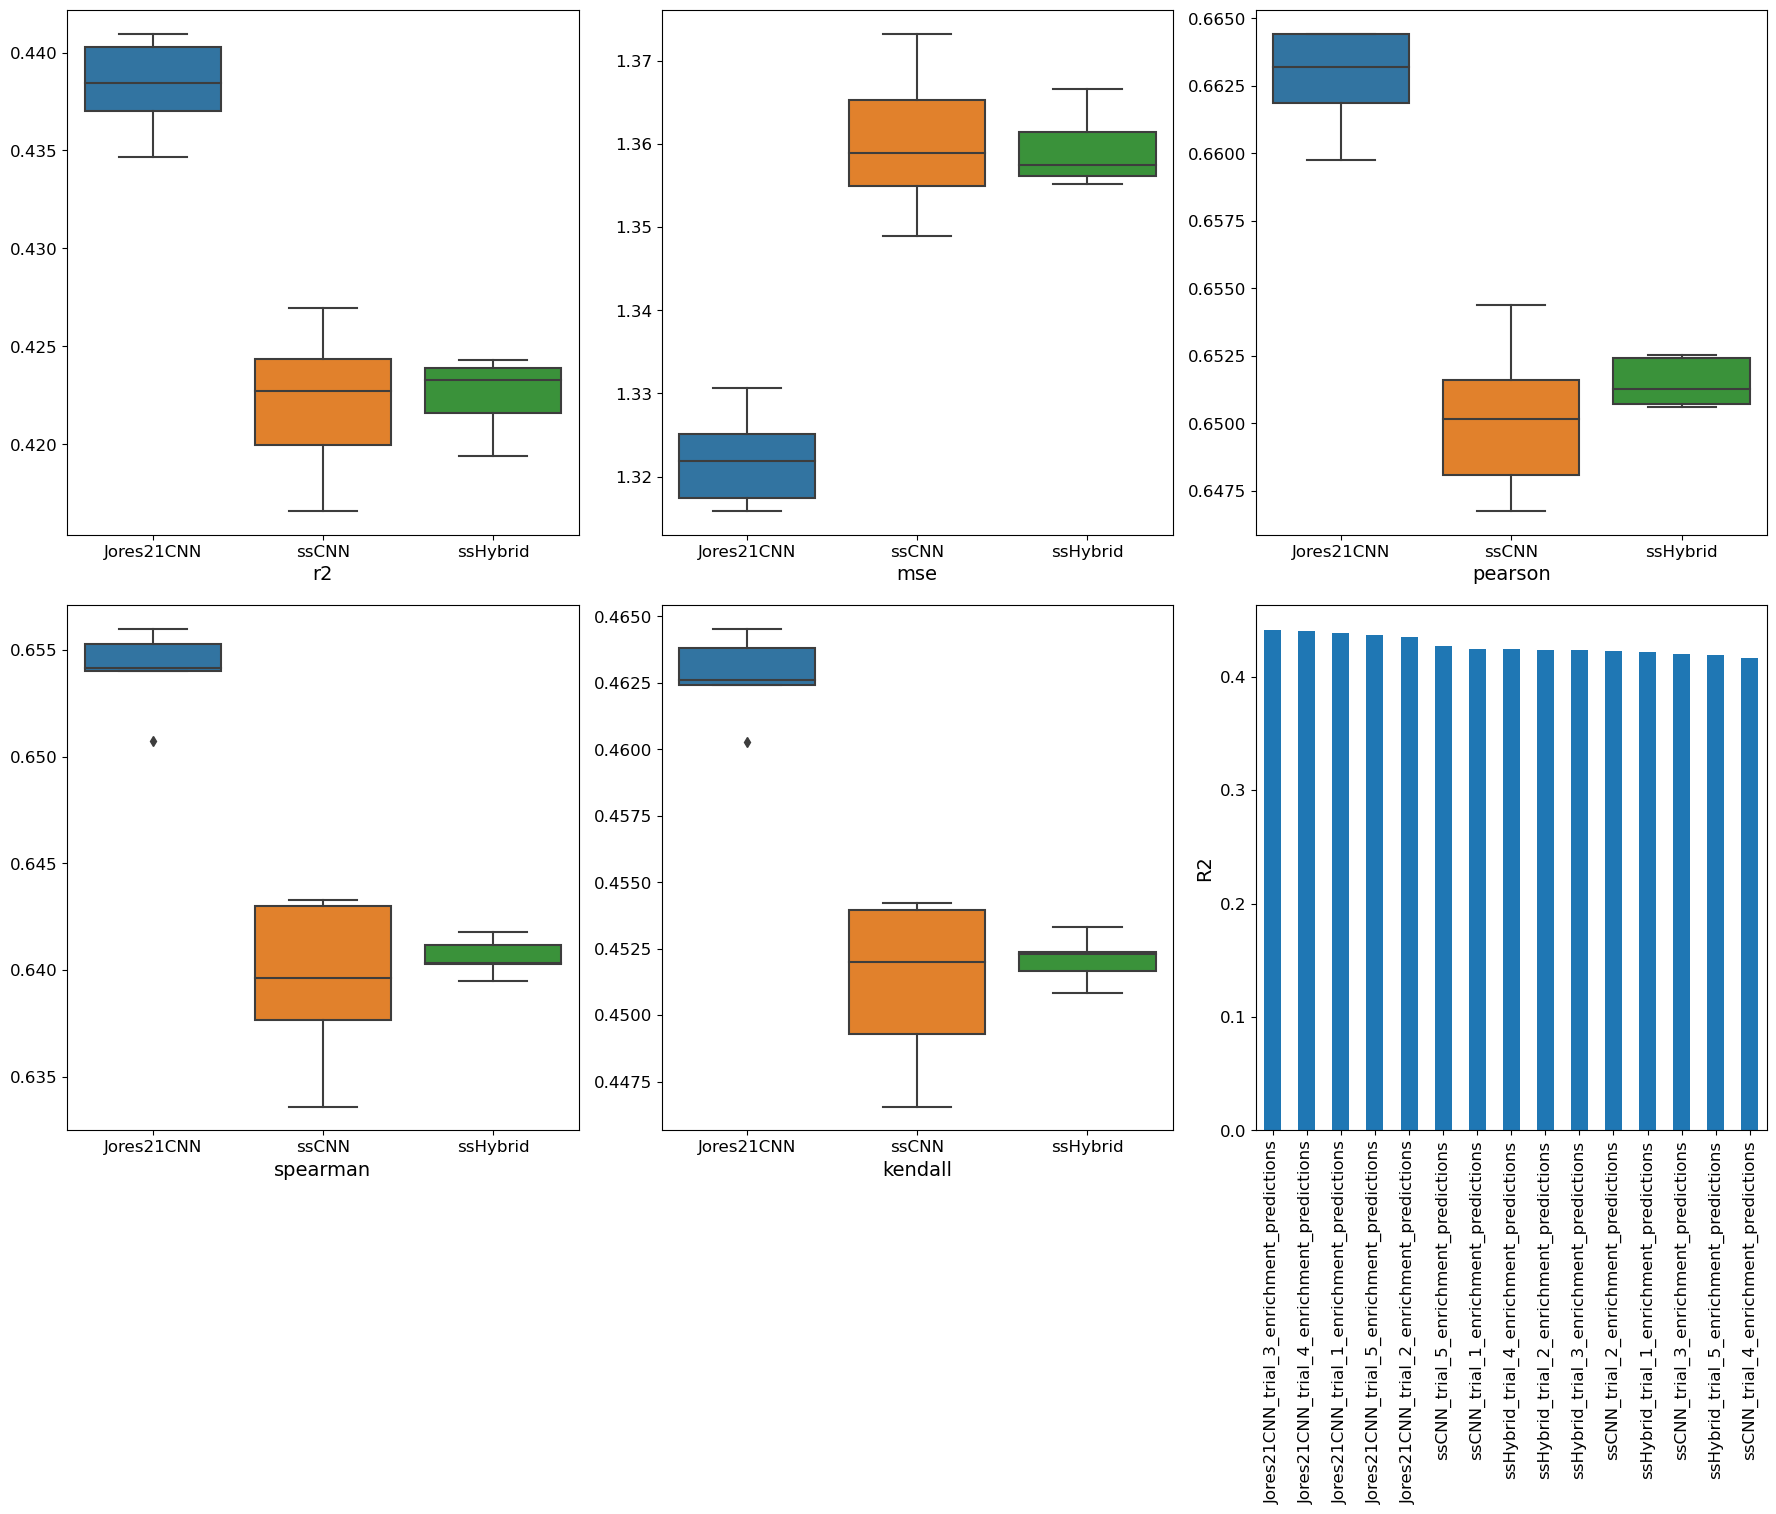

In [21]:
# Summarize performance across models for a metric
model_scores = eu.pl.performance_summary(
    sdata_combined,
    target="enrichment",
    prediction_groups=["Jores21CNN"]*5 + ["ssCNN"]*5 + ["ssHybrid"]*5,
    metrics=["r2", "mse", "pearson", "spearman", "kendall"],
    add_swarm=False,
    figsize=(6, 6),
)

# Identify the best model from returned model scores
r2_sorted = model_scores["r2"].sort_values(ascending=False)
r2_sorted.plot(kind="bar", ylabel="R2")
plt.savefig(os.path.join(eu.settings.figure_dir, "combined_performance_summary.pdf"))

Group R2 MSE Spearmanr
At 0.2257248769573491 2.2233069110173838 0.4383745761470542
Sb 0.48986690138524525 1.0761942257253878 0.7039593540770603
Zm 0.5424380351507121 1.022308605198543 0.7400044973041352


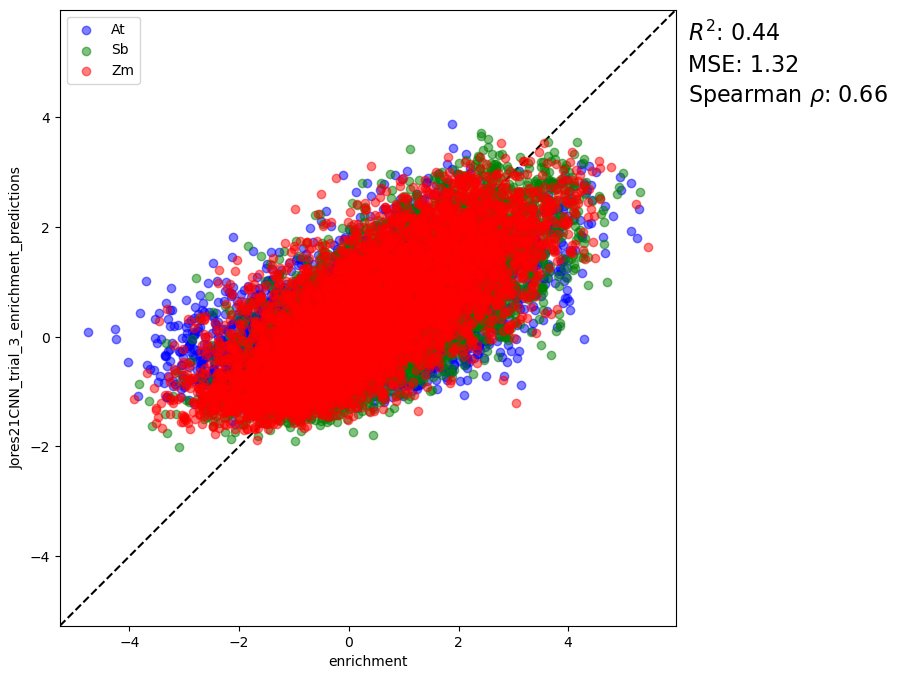

In [22]:
# Plot the performances across species for the best model
best_preds = r2_sorted.index[0]
ax = eu.pl.performance_scatter(
    sdata_combined, 
    targets="enrichment", 
    predictions=best_preds,
    alpha=0.5,
    groupby="sp",
    figsize=(8, 8),
    rasterized=True,
    save=os.path.join(eu.settings.figure_dir, "combined_best_model_performance_scatter_by_sp.pdf")
)

# Seq track logos

In [88]:
sdata_interpretations = eu.dl.read_h5sd(os.path.join(eu.settings.output_dir, "leaf_test_predictions_and_interpretations.h5sd"))

In [37]:
top5 = sdata_interpretations["ssHybrid_trial_5_enrichment_predictions"].sort_values(ascending=False).iloc[:5].index
top5_idx = np.argsort(sdata_interpretations["ssHybrid_trial_5_enrichment_predictions"].values)[::-1][:5]

In [38]:
sdata_interpretations["ssHybrid_trial_5_enrichment_predictions"].iloc[top5_idx]

seq144557    2.731723
seq142876    2.705077
seq143841    2.690675
seq147297    2.649959
seq143806    2.646953
Name: ssHybrid_trial_5_enrichment_predictions, dtype: float64

In [39]:
np.where(np.sum(sdata_interpretations.uns["GradientSHAP_imps"][top5_idx], axis=1) > 0.2)

(array([0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        4, 4, 4, 4, 4, 4, 4, 4]),
 array([122, 123, 124, 125, 126, 127, 120, 121, 118, 119, 120, 121, 122,
        123, 124, 133, 134, 135, 136, 137, 138, 139, 121, 122, 123, 124,
        125, 126, 127, 128]))

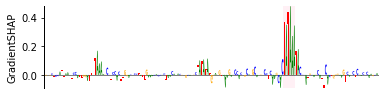

In [40]:
eu.pl.lm_seq_track(
    sdata_interpretations,
    seq_id=top5[0],
    uns_key="GradientSHAP_imps",
    ylabel="GradientSHAP",
    highlights=[(122, 127)],
    figsize=(6, 1.5),
    save=os.path.join(eu.settings.figure_dir, "proto_best_model_feature_attr_1.pdf"),
)

In [43]:
tomtom_cpe = pd.read_csv(os.path.join(eu.settings.output_dir, "leaf_best_model_filters_tomtom_CPE.tsv"), sep="\t")
tomtom_tf = pd.read_csv(os.path.join(eu.settings.output_dir, "leaf_best_model_filters_tomtom_TF.tsv"), sep="\t")
tomtom = pd.concat([tomtom_cpe, tomtom_tf], axis=0)

In [45]:
tomtom_sig = tomtom[tomtom["q-value"] <= 0.05]

In [49]:
tomtom_sig["filter_num"] = tomtom_sig["Query_ID"].str.split("filter").str[-1].astype(int)

/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [69]:
tomtom_sig_init = tomtom_sig[tomtom_sig["filter_num"] <= 77]
tomtom_sig_learned = tomtom_sig[tomtom_sig["filter_num"] > 77]

In [70]:
len(tomtom_sig_init["Target_ID"].unique())

70

In [81]:
tomtom_sig_init_tf = tomtom_sig_init[tomtom_sig_init["Target_ID"].str.contains("TF")]
tomtom_sig_init_cpe = tomtom_sig_init[(tomtom_sig_init["Target_ID"].str.contains("TF") == False)]

In [74]:
tomtom_sig_init_tf["TF_cluster"] = tomtom_sig_init_tf["Target_ID"].str.split("_").str[-1]
tomtom_sig_init_tf["TF_cluster"] = tomtom_sig_init_tf["TF_cluster"].astype(int)

/cellar/users/aklie/opt/miniconda3/envs/eugene_dev/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [77]:
(tomtom_sig_init_tf["TF_cluster"] + 5 == tomtom_sig_init_tf["filter_num"]).sum()

63

In [ ]:
all 6 remained sig

In [82]:
tomtom_sig_init_cpe.value

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,filter_num
0,filter0,TATA,0.0,7.928410e-11,4.757040e-10,9.514090e-10,13.0,CCCCTATAAATAC,TCCCTATAAATACCCC,+,0
6,filter1,Inr,0.0,3.494580e-08,2.096750e-07,4.193490e-07,10.0,CTATTCATCAACT,CTATTCATCA,+,1
12,filter2,POL006.1,0.0,1.222870e-08,7.337220e-08,1.467440e-07,8.0,AGCGCGCCCCCCC,AGCGCGCC,+,2
18,filter3,POL007.1,0.0,2.871910e-04,1.723150e-03,3.446300e-03,7.0,GTTTTTTTTAAAA,GTTTGTT,+,3
24,filter4,Ypatch,0.0,2.201220e-05,1.320730e-04,2.641460e-04,8.0,CCCCCCCCCCCCT,CCCCCCCC,+,4
30,filter5,TCT,0.0,3.502240e-05,2.101350e-04,4.202690e-04,6.0,TCTTTTAAAAAAA,TCTTTT,+,5
138,filter23,TCT,0.0,6.596520e-04,3.957910e-03,7.915830e-03,6.0,AAAAGACAAAAAA,AAAAGA,-,23
252,filter42,Inr,-3.0,1.980290e-03,1.188170e-02,2.376350e-02,10.0,CAATCATTCATAA,CTATTCATCA,+,42
336,filter56,Inr,-2.0,7.759490e-04,4.655690e-03,9.311380e-03,10.0,GACTTTTCATATT,CTATTCATCA,+,56


In [ ]:
63 out 72

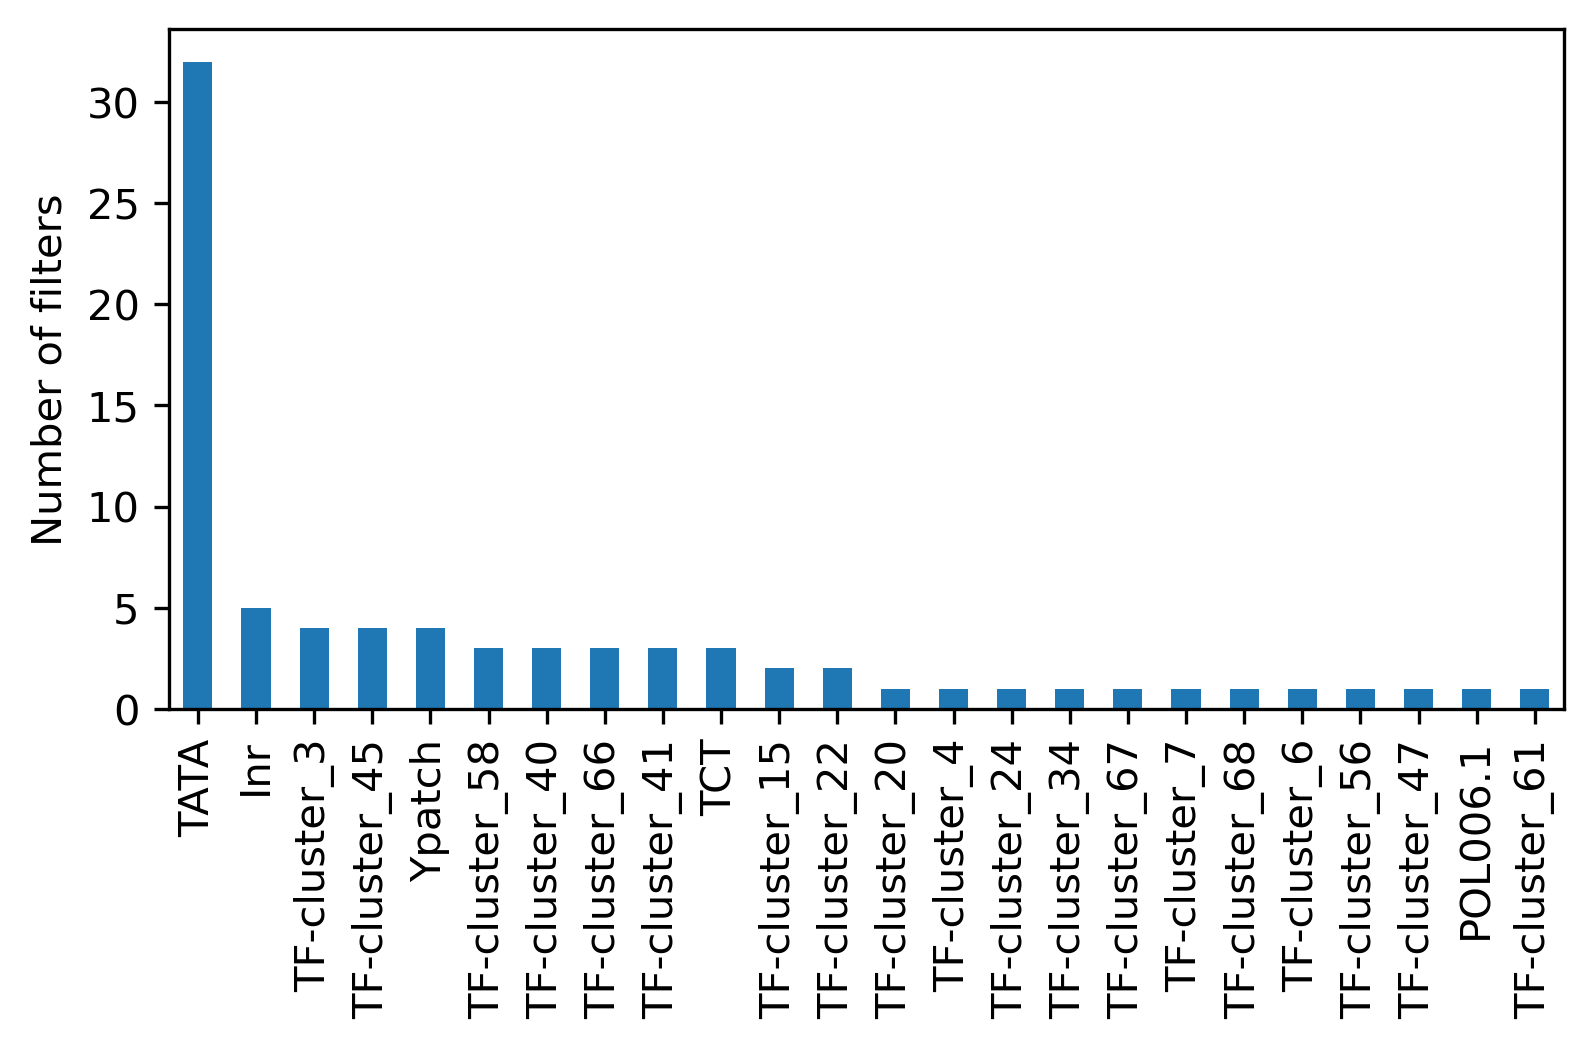

In [87]:
plt.figure(figsize=(6, 3), dpi=300)
tomtom_sig_learned["Target_ID"].value_counts().plot(kind="bar", ylabel="Number of filters")
plt.savefig(os.path.join(eu.settings.figure_dir, "leaf_best_model_filters_tomtom_barplot.pdf"))

In [95]:
tomtom_sig_learned.sort_values("q-value").groupby("Target_ID").head(1)

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation,filter_num
888,filter148,TATA,2.0,1.339180e-09,8.035060e-09,1.607010e-08,13.0,CCTATAAATACAC,TCCCTATAAATACCCC,+,148
1500,filter250,Ypatch,0.0,2.529010e-07,1.517410e-06,3.034810e-06,8.0,CCCCCCTTCTCTC,CCCCCCCC,+,250
1085,filter115,TF-cluster_45,1.0,1.730300e-07,1.245820e-05,2.451990e-05,13.0,CCCCCCTTCTCTC,TTTCTTTTTTTTTTTTT,+,115
1655,filter185,TF-cluster_15,-2.0,7.908400e-07,5.694050e-05,1.112740e-04,10.0,GTGTGGGCCCCAC,GTGGGCCCCA,-,185
1900,filter215,TF-cluster_67,-2.0,8.212890e-07,5.913280e-05,1.155580e-04,11.0,AAAAAAAAAAAAA,AAAAAAAAAAA,+,215
2198,filter250,TF-cluster_66,0.0,4.028270e-06,2.900360e-04,2.854200e-04,13.0,CCCCCCTTCTCTC,CCTCCTCCTCCTCCTCCTC,+,250
808,filter84,TF-cluster_3,-6.0,1.019950e-05,7.343620e-04,1.397900e-03,7.0,CCCCGCCGCCGCC,CGCCGCC,+,84
1208,filter130,TF-cluster_7,0.0,2.361340e-05,1.700170e-03,3.308280e-03,9.0,CACGTCAGCGTCG,CACGTCAGC,-,130
1289,filter141,TF-cluster_6,-5.0,5.026260e-05,3.618910e-03,3.553920e-03,6.0,CCTGCCACGTGGG,CACGTG,+,141
1660,filter186,TF-cluster_58,0.0,1.008220e-04,7.259220e-03,8.738130e-03,6.0,CGGCCGTCGACAC,CGGCCG,-,186


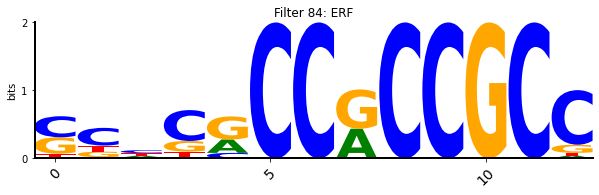

In [111]:
# Visualize a filter of choice
eu.pl.lm_filter_viz(
    sdata_interpretations,
    filter_id=84,
    save=os.path.join(eu.settings.figure_dir, "leaf_best_model_filter84_viz.pdf"),
    title="Filter 84: ERF",
)

In [104]:
sdata_interpretations.uns["pfms"][140]

,A,C,G,T
0,0.06,0.00,0.80,0.14
1,0.02,0.87,0.11,0.00
2,0.09,0.32,0.14,0.45
3,0.27,0.65,0.00,0.08
4,1.00,0.00,0.00,0.00
5,0.05,0.00,0.27,0.68
6,0.00,0.15,0.00,0.85
7,0.74,0.22,0.04,0.00
8,0.88,0.01,0.03,0.08
9,0.02,0.34,0.18,0.46


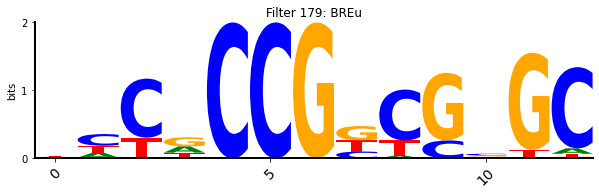

In [107]:
# Visualize a filter of choice
eu.pl.lm_filter_viz(
    sdata_interpretations,
    filter_id=179,
    save=os.path.join(eu.settings.figure_dir, "leaf_best_model_filter179_viz.pdf"),
    title="Filter 179: BREu",
)

# Loss curve

             metric     value    step
0         hp_metric -1.000000     0.0
1         hp_metric  0.444291   457.0
2         hp_metric  0.531138   915.0
3         hp_metric  0.554850  1373.0
4         hp_metric  0.578895  1831.0
..              ...       ...     ...
632  train_r2_epoch  0.780219  6411.0
633  train_r2_epoch  0.785324  6869.0
634  train_r2_epoch  0.789817  7327.0
635  train_r2_epoch  0.797112  7785.0
636  train_r2_epoch  0.798641  8243.0

[637 rows x 3 columns]
             metric     value    step
0         hp_metric -1.000000     0.0
1         hp_metric  0.444291   457.0
2         hp_metric  0.531138   915.0
3         hp_metric  0.554850  1373.0
4         hp_metric  0.578895  1831.0
..              ...       ...     ...
632  train_r2_epoch  0.780219  6411.0
633  train_r2_epoch  0.785324  6869.0
634  train_r2_epoch  0.789817  7327.0
635  train_r2_epoch  0.797112  7785.0
636  train_r2_epoch  0.798641  8243.0

[637 rows x 3 columns]


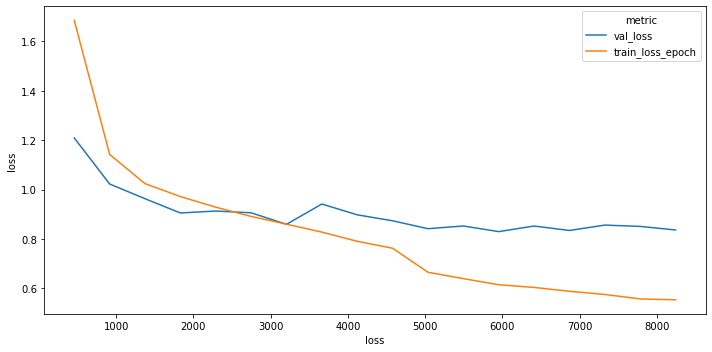

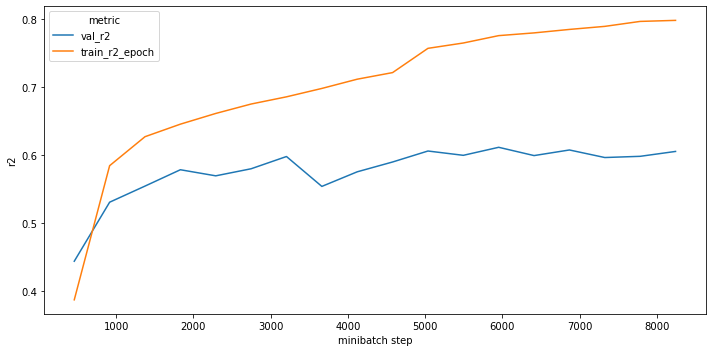

In [9]:
eu.pl.training_summary(
    "/cellar/users/aklie/projects/EUGENe/EUGENe_paper/logs/jores21/ssHybrid/leaf_trial_5",
    metrics="r2",
    save=os.path.join(eu.settings.figure_dir, "leaf_best_model_training_summary.pdf")
)


---

# Scratch